## 1. Import Libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [14]:
file_path = r"D:\Projects\Machine Learning\Flight Price Prediction\data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-09,Kolkata,Banglore,14:05:00,12:00:00,1315,1.0,In-flight meal not included,9663
1,Jet Airways,2019-06-06,Kolkata,Banglore,18:55:00,04:40:00,585,1.0,In-flight meal not included,7757
2,Indigo,2019-05-12,Banglore,Delhi,10:10:00,13:00:00,170,0.0,No Info,3943
3,Air Asia,2019-04-09,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
4,Spicejet,2019-06-01,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No Info,3873
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-04-15,Delhi,Cochin,08:45:00,13:15:00,270,1.0,No Info,5830
636,Multiple Carriers,2019-06-01,Delhi,Cochin,12:50:00,01:30:00,760,1.0,No Info,6795
637,Jet Airways,2019-05-12,Kolkata,Banglore,20:25:00,18:00:00,1295,1.0,No Info,14151
638,Indigo,2019-06-12,Chennai,Kolkata,22:05:00,00:25:00,140,0.0,No Info,5277


In [16]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [25]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=False, format='mixed')
    for col in ['date_of_journey', 'dep_time', 'arrival_time']
})

train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-09,Kolkata,Banglore,2024-07-30 14:05:00,2024-07-30 12:00:00,1315,1.0,In-flight meal not included,9663
1,Jet Airways,2019-06-06,Kolkata,Banglore,2024-07-30 18:55:00,2024-07-30 04:40:00,585,1.0,In-flight meal not included,7757
2,Indigo,2019-05-12,Banglore,Delhi,2024-07-30 10:10:00,2024-07-30 13:00:00,170,0.0,No Info,3943
3,Air Asia,2019-04-09,Banglore,Delhi,2024-07-30 04:55:00,2024-07-30 07:45:00,170,0.0,No Info,4282
4,Spicejet,2019-06-01,Kolkata,Banglore,2024-07-30 06:55:00,2024-07-30 09:30:00,155,0.0,No Info,3873
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-04-15,Delhi,Cochin,2024-07-30 08:45:00,2024-07-30 13:15:00,270,1.0,No Info,5830
636,Multiple Carriers,2019-06-01,Delhi,Cochin,2024-07-30 12:50:00,2024-07-30 01:30:00,760,1.0,No Info,6795
637,Jet Airways,2019-05-12,Kolkata,Banglore,2024-07-30 20:25:00,2024-07-30 18:00:00,1295,1.0,No Info,14151
638,Indigo,2019-06-12,Chennai,Kolkata,2024-07-30 22:05:00,2024-07-30 00:25:00,140,0.0,No Info,5277


## 3. High level summary

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [31]:
train.describe(include='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,631.210938,0.787500,9187.078125
std,498.111671,0.641667,4480.818880
min,80.000000,0.000000,1965.000000
25%,175.000000,0.000000,5225.500000
50%,520.000000,1.000000,8529.000000
75%,890.000000,1.000000,12386.000000
max,2295.000000,3.000000,31783.000000


In [32]:
train.describe(include='O')

,airline,source,destination,additional_info
count,640,640,640,640
unique,9,5,6,3
top,Jet Airways,Delhi,Cochin,No Info
freq,242,267,267,488


In [33]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,242,267,267,354.0,488


## 4. High level analysis of missing values

In [35]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


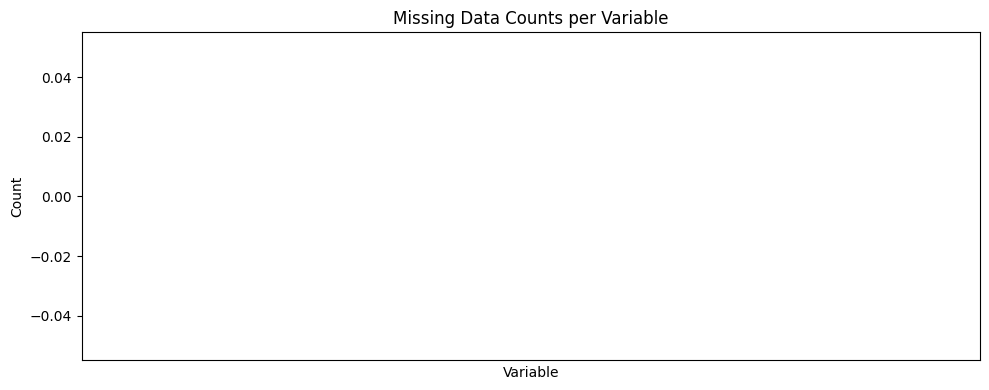

In [36]:
eda_helper_functions.plot_missing_info(train)

## 5. High level analysis of outliers

In [38]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [42]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns='price')
                                       .select_dtypes(include ='number')))
    .query('outlier==-1')
    .duration
    .describe()
)

count     234.000000
mean      899.679487
std       646.459160
min        80.000000
25%       185.000000
50%      1037.500000
75%      1488.750000
max      2295.000000
Name: duration, dtype: float64

## 6. Pair plots

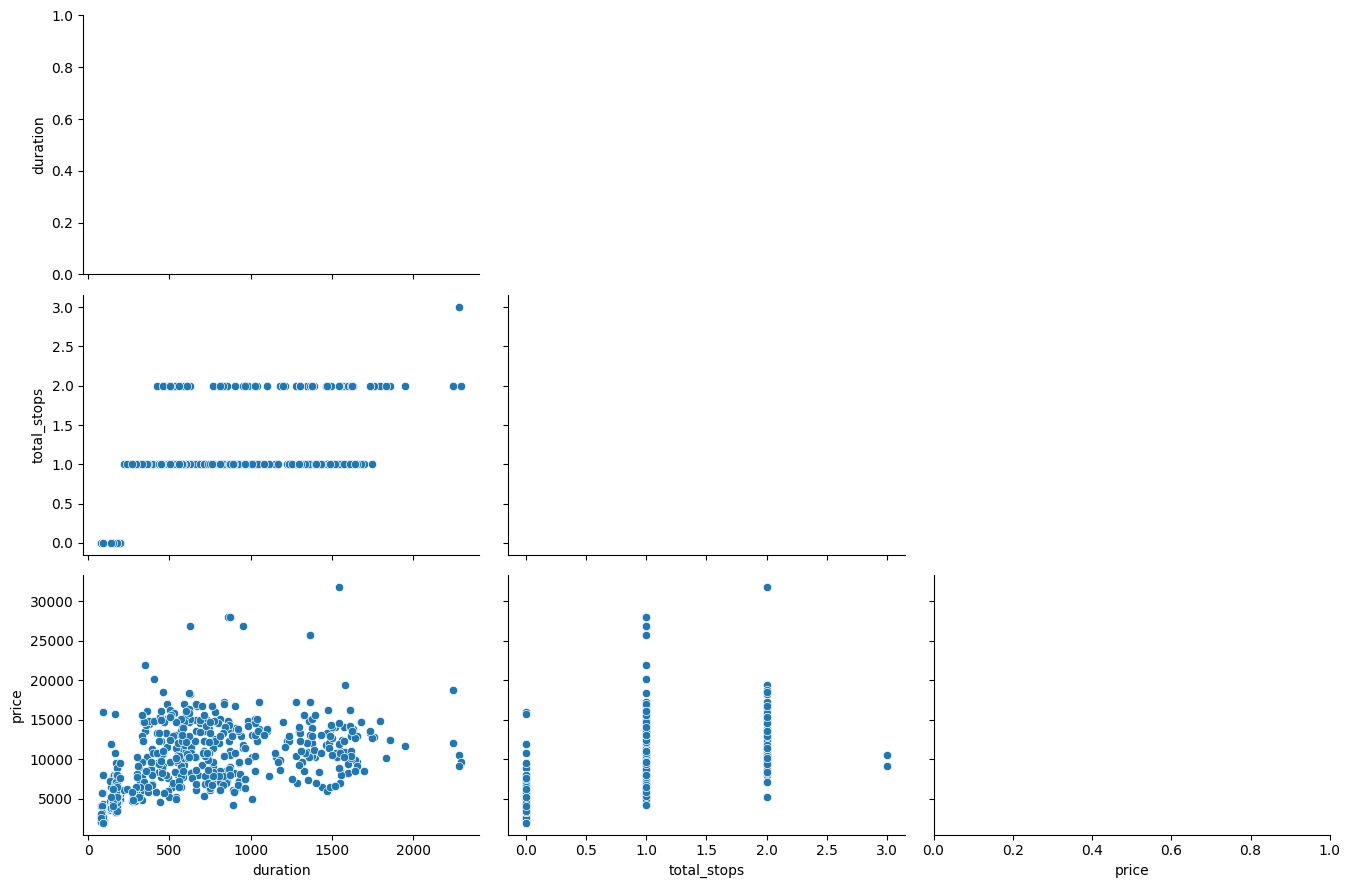

In [43]:
eda_helper_functions.pair_plots(train)

## 7. Coorelation analysis

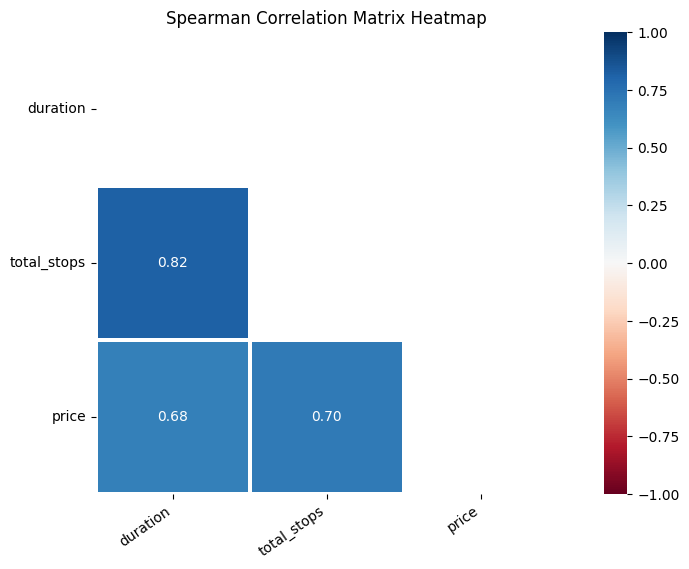

In [44]:
eda_helper_functions.correlation_heatmap(train)

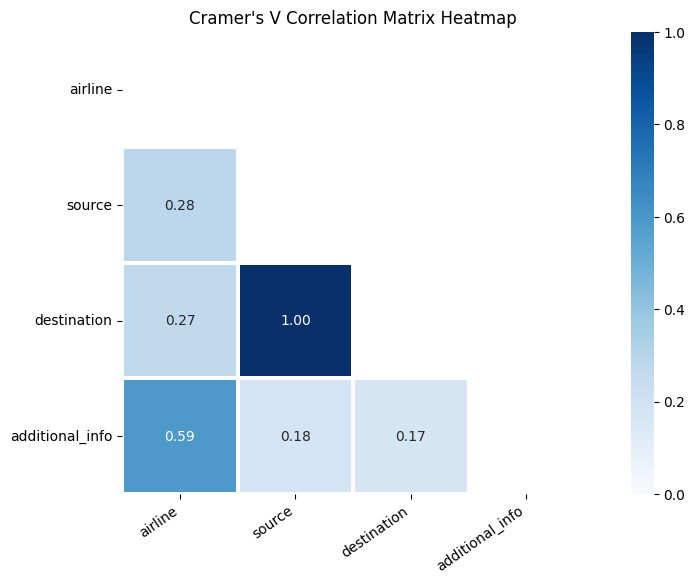

In [49]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed analysis

In [50]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [54]:
train.airline

0            Jet Airways
1            Jet Airways
2                 Indigo
3               Air Asia
4               Spicejet
             ...        
635             Spicejet
636    Multiple Carriers
637          Jet Airways
638               Indigo
639               Indigo
Name: airline, Length: 640, dtype: object

In [55]:
eda_helper_functions.cat_summary(train)

0            Jet Airways
1            Jet Airways
2                 Indigo
3               Air Asia
4               Spicejet
             ...        
635             Spicejet
636    Multiple Carriers
637          Jet Airways
638               Indigo
639               Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,242


,count,percentage
category,,
Jet Airways,242,0.378125
Indigo,117,0.182812
Air India,96,0.150000
Multiple Carriers,82,0.128125
Spicejet,49,0.076563
Vistara,22,0.034375
Air Asia,17,0.026562
Goair,14,0.021875
Vistara Premium Economy,1,0.001563


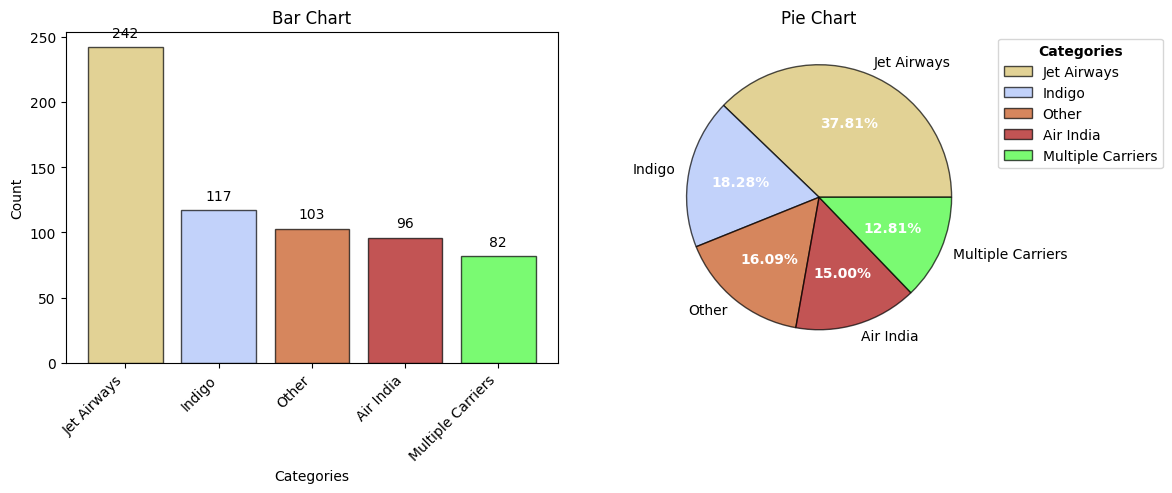

In [58]:
eda_helper_functions.cat_univar_plots(train, 'airline', show_wordcloud=False, k=4)

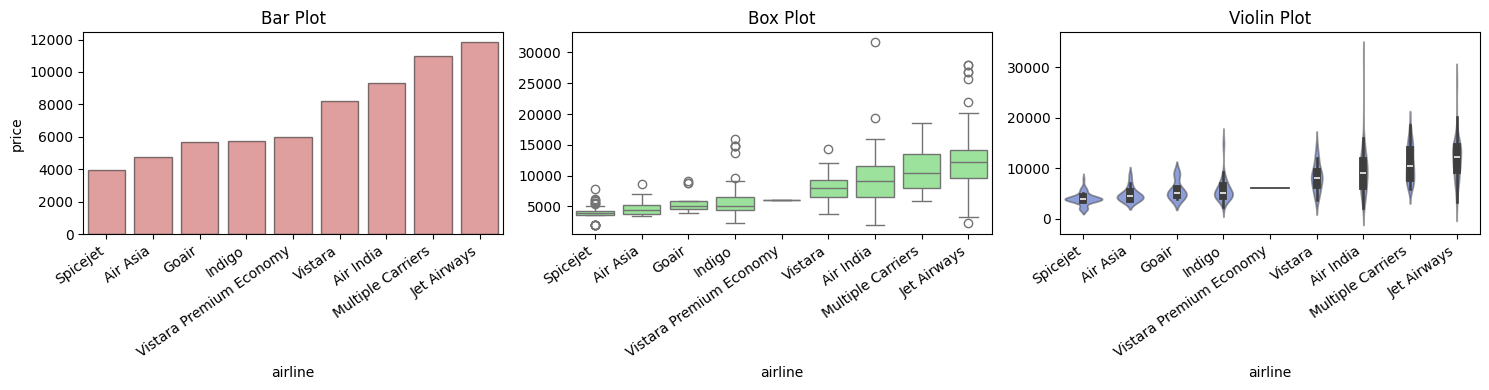

In [59]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var='price',
    cat_var='airline'
)

In [60]:
eda_helper_functions.num_cat_hyp_testing(train, 'price', 'airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 54.60907038628849
- p-value              : 3.0194225079607583e-67
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 312.4457799236921
- p-value              : 9.219554690648132e-63
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


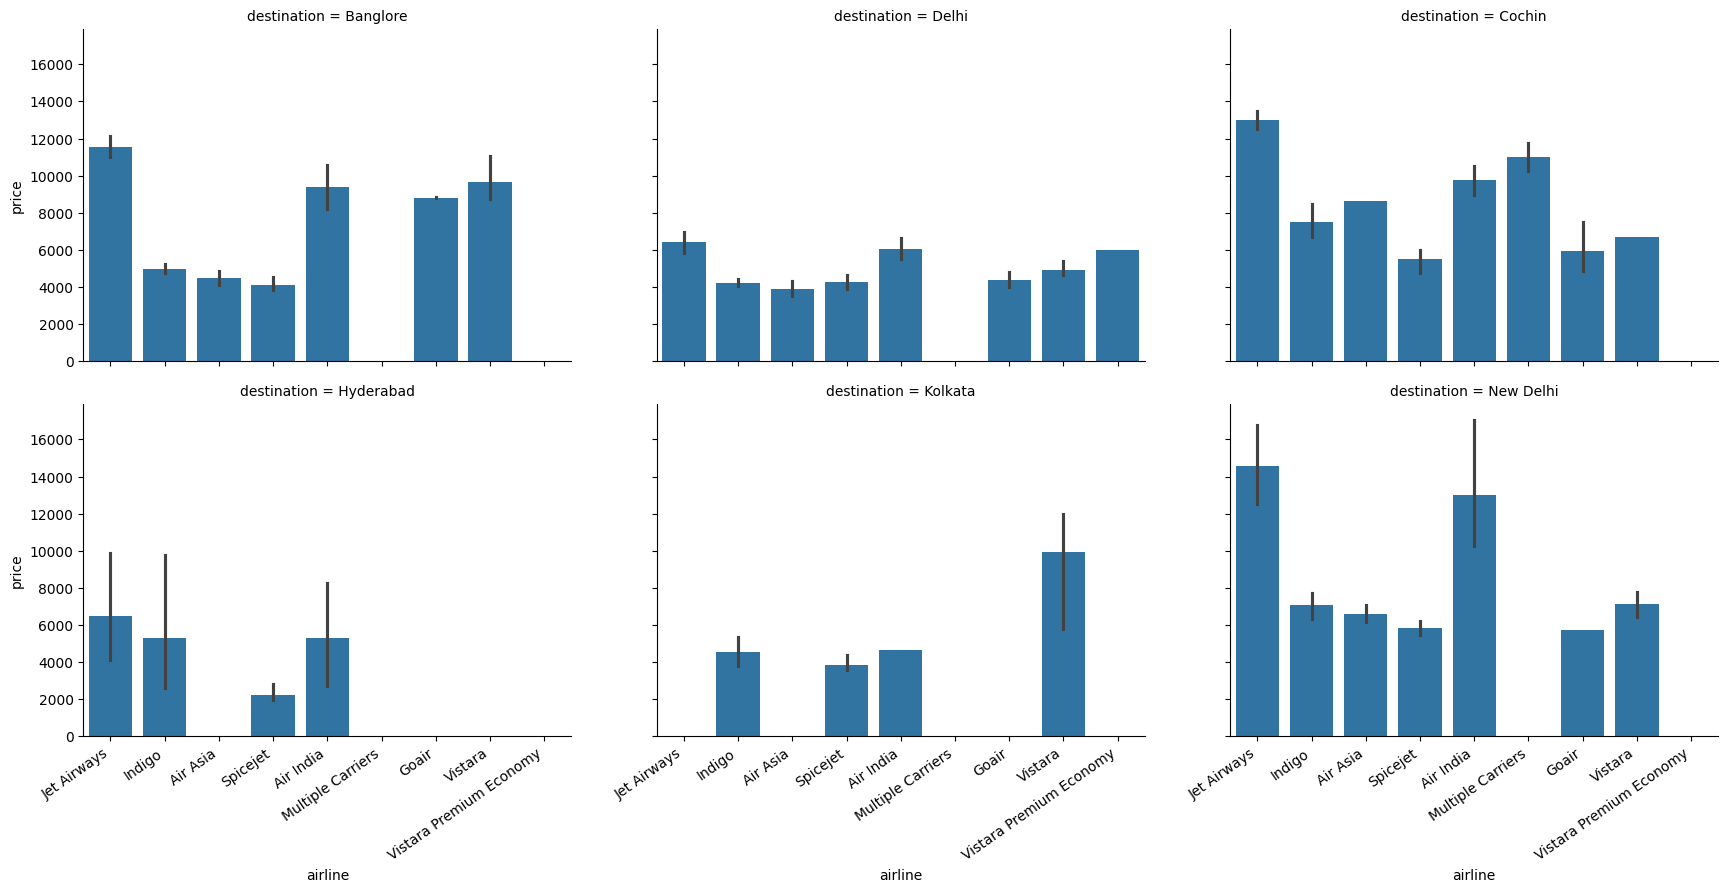

In [68]:
airline_grid = sns.FacetGrid(
    data=train,
    col='destination',
    col_wrap=3,
    height=4,
    aspect=1.5,
    sharey=True
)

airline_grid.map(sns.barplot, 'airline', 'price', order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.1 date_of_journey

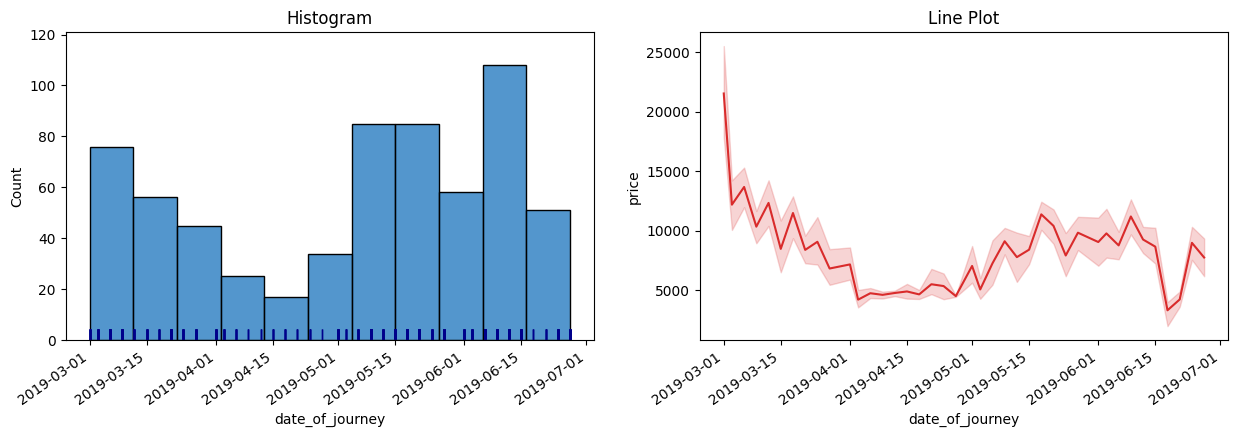

In [69]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var='date_of_journey',
    target='price'
)

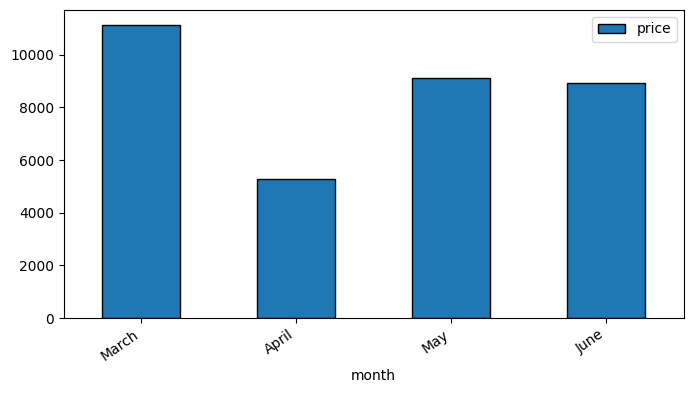

In [90]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='M'))
    .price.mean()
    .to_frame()
    .set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize=(8, 4),
        edgecolor='black'
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

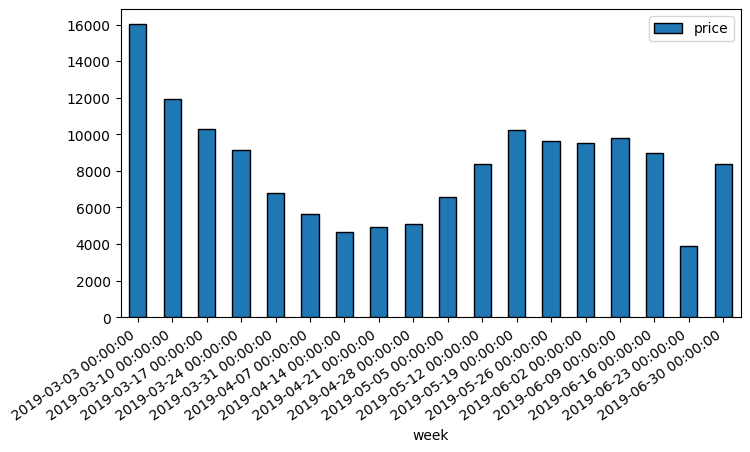

In [92]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='w'))
    .price.mean()
    .to_frame()
    # .set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis(index='week')
    .plot(
        kind='bar',
        figsize=(8, 4),
        edgecolor='black'
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

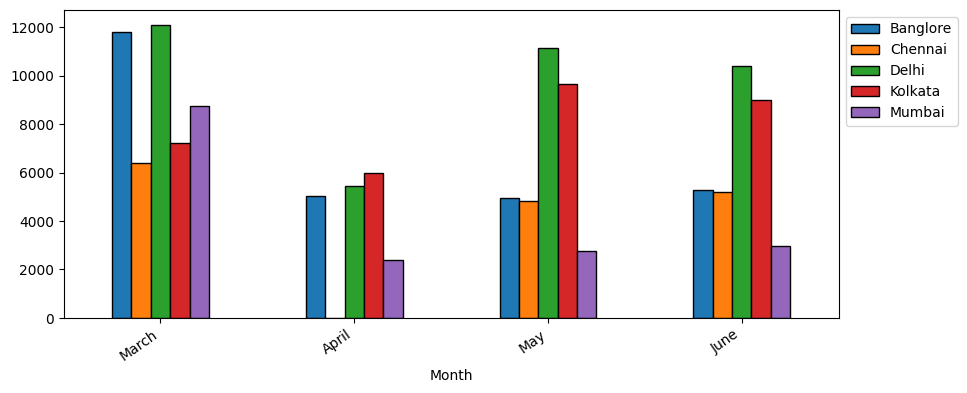

In [109]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq='m'), 'source'])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis(index='Month')
    .plot(
        kind='bar',
        figsize=(10, 4),
        edgecolor='black',
    )
)

ax = plt.gca()

ax.legend(
    loc='upper left',
    bbox_to_anchor=(1,1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.2 dep_time

In [110]:
train.dep_time

0     2024-07-30 14:05:00
1     2024-07-30 18:55:00
2     2024-07-30 10:10:00
3     2024-07-30 04:55:00
4     2024-07-30 06:55:00
              ...        
635   2024-07-30 08:45:00
636   2024-07-30 12:50:00
637   2024-07-30 20:25:00
638   2024-07-30 22:05:00
639   2024-07-30 06:50:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

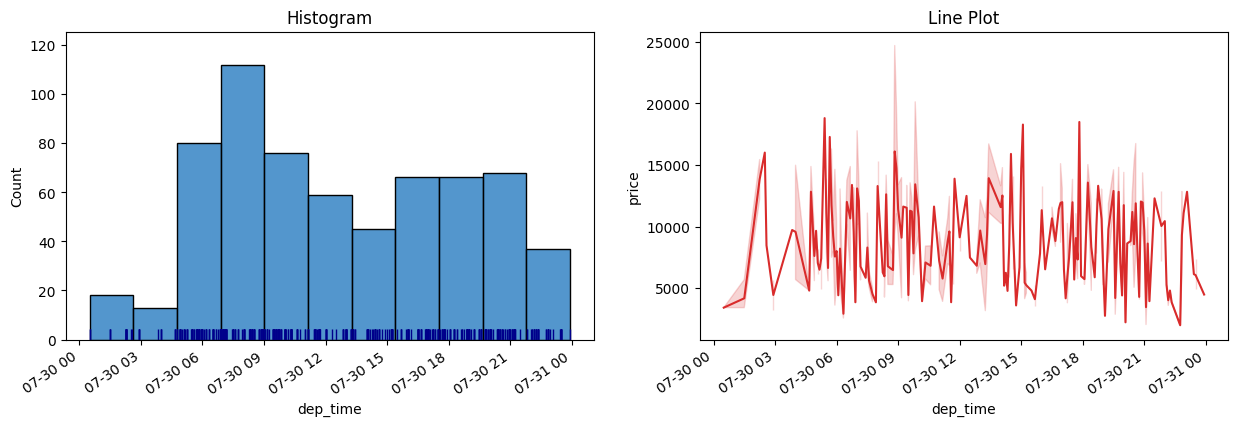

In [111]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var='dep_time',
    target='price'
)

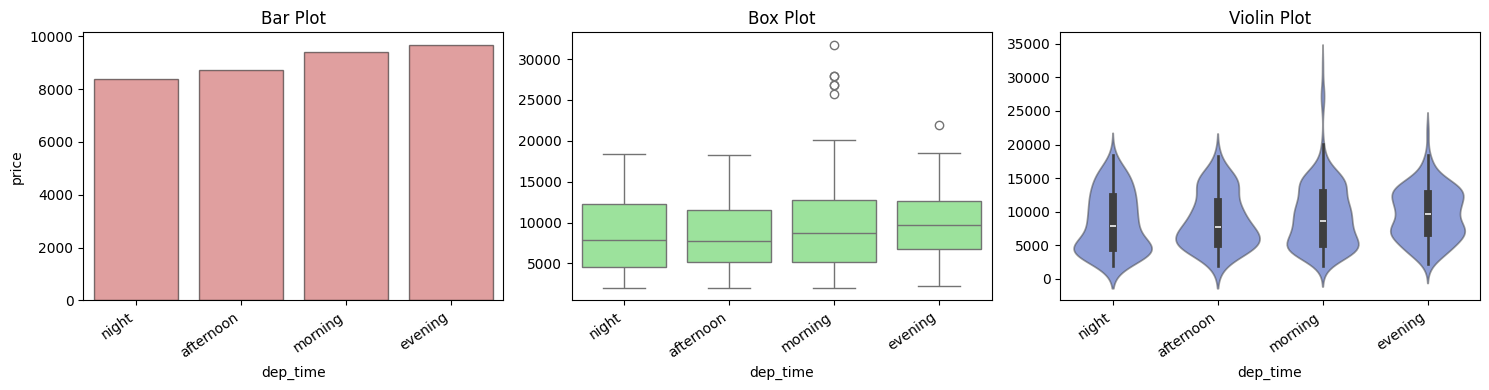

In [118]:
(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4, 12, inclusive='left'),
                   df_.dep_time.dt.hour.between(12, 16, inclusive='left'),
                   df_.dep_time.dt.hour.between(16, 20, inclusive='left')],
                  ['morning', 'afternoon', 'evening'],
                    default='night')
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, 'price', 'dep_time')
)

### 8.4 Duration

In [119]:
train.duration

0      1315
1       585
2       170
3       170
4       155
       ... 
635     270
636     760
637    1295
638     140
639     560
Name: duration, Length: 640, dtype: int64

In [121]:
eda_helper_functions.num_summary(train, 'duration')

0      1315
1       585
2       170
3       170
4       155
       ... 
635     270
636     760
637    1295
638     140
639     560
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.00
5,135.00
10,150.00
25,175.00
50,520.00
75,890.00
90,1480.00
95,1595.00
99,1845.25


,value
mean,631.210938
trimmed mean (5%),597.673611
trimmed mean (10%),567.871094
median,520.000000


,value
var,248115.237126
std,498.111671
IQR,715.000000
mad,350.000000
coef_variance,0.789137


,value
skewness,0.930261
kurtosis,0.012872


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.63530952312693e-22
Test Statistic       : 0.8809939358058697
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.77705297116779
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [122]:
train.duration.quantile([.25, .5, .75])

0.25    175.0
0.50    520.0
0.75    890.0
Name: duration, dtype: float64

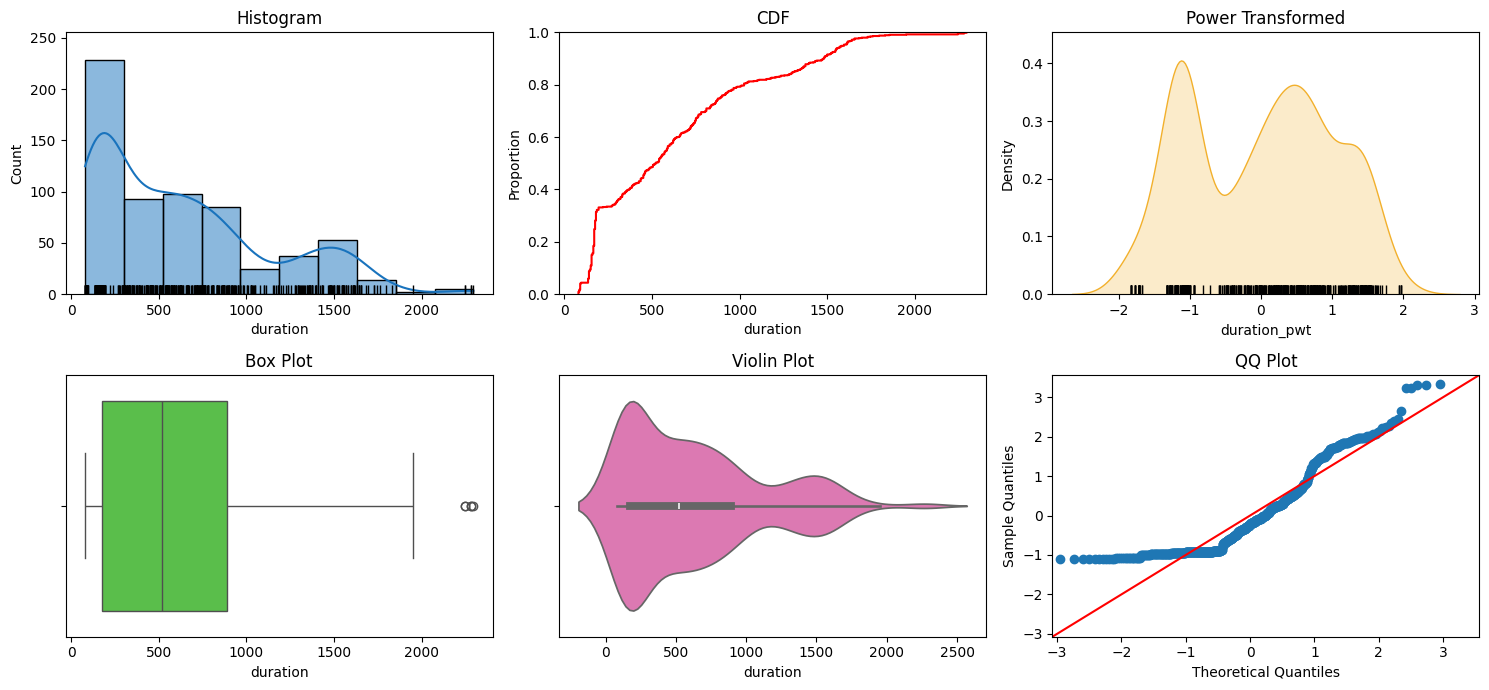

In [123]:
eda_helper_functions.num_univar_plots(train, 'duration')

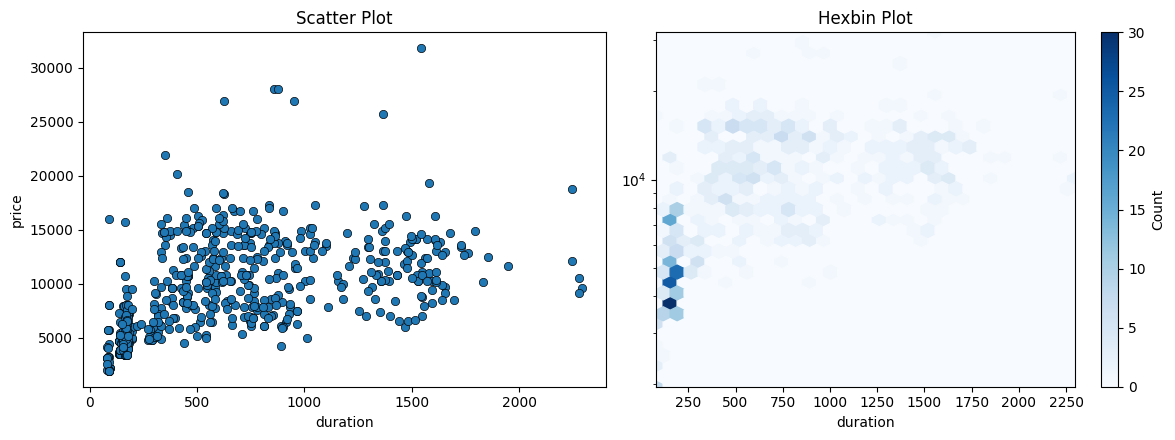

In [126]:
eda_helper_functions.num_bivar_plots(
    train,
    'duration',
    'price',
    hexbin_kwargs=dict(
        yscale='log',
        gridsize=30,
        cmap='Blues'
    )
)

In [128]:
eda_helper_functions.num_num_hyp_testing(train, 'price', 'duration')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5328916462800954
- p-value              : 3.1146291193419517e-48
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6810855739728788
- p-value              : 1.9979687849864487e-88
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


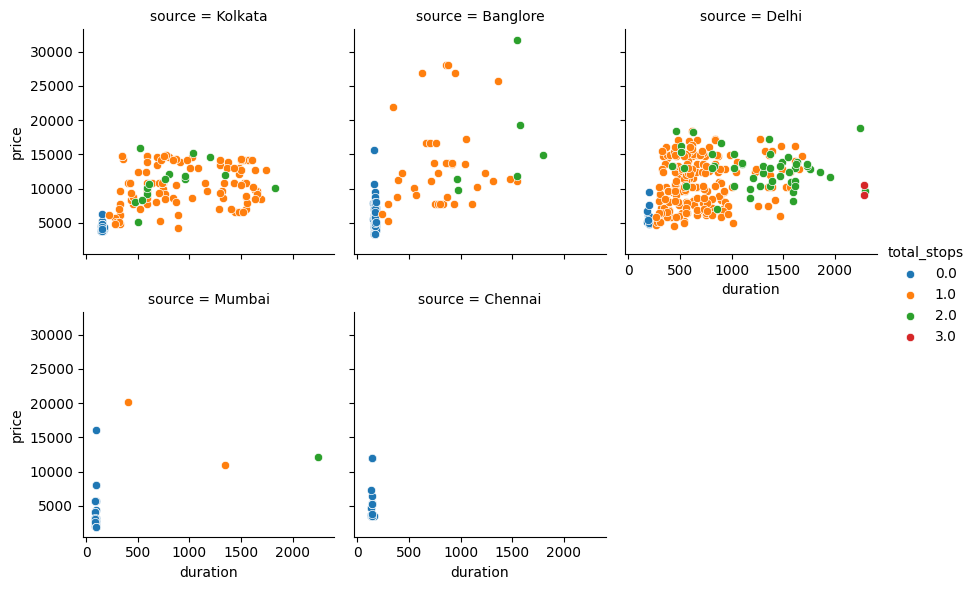

In [135]:
duration_grid=sns.FacetGrid(
    data=train,
    height=3,
    aspect=1,
    col='source',
    hue='total_stops',
    col_wrap=3,
    sharey=True, 
)

duration_grid.map(sns.scatterplot, 'duration', 'price')

duration_grid.add_legend()

## 9. Automated EDA

In [139]:
from ydata_profiling import ProfileReport

In [141]:
report= ProfileReport(train)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]